In [4]:
%%bash
wget http://data.dmlc.ml/models/imagenet/inception-bn/Inception-BN-symbol.json

--2017-08-04 19:53:57--  http://data.dmlc.ml/models/imagenet/inception-bn/Inception-BN-symbol.json
Resolving data.dmlc.ml... 54.208.175.7
Connecting to data.dmlc.ml|54.208.175.7|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 116922 (114K) [application/json]
Saving to: ‘Inception-BN-symbol.json.1’

     0K .......... .......... .......... .......... .......... 43% 61.1K 1s
    50K .......... .......... .......... .......... .......... 87%  122K 0s
   100K .......... ....                                       100% 54.7M=1.2s

2017-08-04 19:53:59 (93.0 KB/s) - ‘Inception-BN-symbol.json.1’ saved [116922/116922]



In [6]:
%%bash
wget http://data.dmlc.ml/models/imagenet/inception-bn/Inception-BN-0126.params

--2017-08-04 19:54:28--  http://data.dmlc.ml/models/imagenet/inception-bn/Inception-BN-0126.params
Resolving data.dmlc.ml... 54.208.175.7
Connecting to data.dmlc.ml|54.208.175.7|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 45284780 (43M)
Saving to: ‘Inception-BN-0126.params.1’

     0K .......... .......... .......... .......... ..........  0% 82.3K 8m57s
    50K .......... .......... .......... .......... ..........  0%  164K 6m42s
   100K .......... .......... .......... .......... ..........  0% 9.77M 4m29s
   150K .......... .......... .......... .......... ..........  0%  157K 4m32s
   200K .......... .......... .......... .......... ..........  0% 12.5M 3m38s
   250K .......... .......... .......... .......... ..........  0% 82.2K 4m31s
   300K .......... .......... .......... .......... ..........  0%  163M 3m52s
   350K .......... .......... .......... .......... ..........  0%  137M 3m22s
   400K .......... .......... .......... .......... .........

In [7]:
%%bash
mv Inception-BN-0126.params Inception-BN-0000.params

In [8]:
%%bash
wget http://data.dmlc.ml/models/imagenet/synset.txt

--2017-08-04 20:35:17--  http://data.dmlc.ml/models/imagenet/synset.txt
Resolving data.dmlc.ml... 54.208.175.7
Connecting to data.dmlc.ml|54.208.175.7|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 31675 (31K) [text/plain]
Saving to: ‘synset.txt’

     0K .......... .......... ..........                      100%  101K=0.3s

2017-08-04 20:35:19 (101 KB/s) - ‘synset.txt’ saved [31675/31675]



In [9]:
%%bash
wc -l synset.txt
head -5 synset.txt

    1000 synset.txt
n01440764 tench, Tinca tinca
n01443537 goldfish, Carassius auratus
n01484850 great white shark, white shark, man-eater, man-eating shark, Carcharodon carcharias
n01491361 tiger shark, Galeocerdo cuvieri
n01494475 hammerhead, hammerhead shark


In [13]:
%matplotlib inline
import cv2
from matplotlib import pyplot as plt
import numpy as np
import time as t
print("OpenCV Version : %s " % cv2.__version__)

OpenCV Version : 3.2.0 


In [10]:
import mxnet as mx
sym, arg_params, aux_params = mx.model.load_checkpoint('Inception-BN', 0)

In [11]:
mod = mx.mod.Module(symbol=sym)
mod.bind(for_training=False, data_shapes=[('data', (1,3,224,224))])
mod.set_params(arg_params, aux_params)

/Users/taemyung/anaconda/envs/py35/lib/python3.5/site-packages/mxnet/module/base_module.py:64: UserWarning: Data provided by label_shapes don't match names specified by label_names ([] vs. ['softmax_label'])
  warnings.warn(msg)


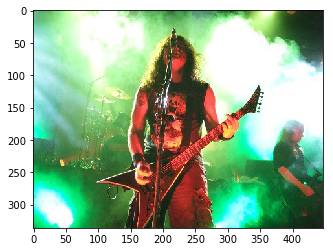

In [18]:
img = cv2.imread("kreator.jpeg")
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()

img = cv2.resize(img, (224, 224,))
img = np.swapaxes(img, 0, 2)
img = np.swapaxes(img, 1, 2)
img = img[np.newaxis, :]

In [19]:
array = mx.nd.array(img)
print(array.shape)

(1, 3, 224, 224)


In [20]:
from collections import namedtuple
Batch = namedtuple('Batch', ['data'])
mod.forward(Batch([array]))

In [25]:
synsetfile = open('synset.txt', 'r')
categorylist = []
for line in synsetfile:
    categorylist.append(line.rstrip())

prob = mod.get_outputs()[0].asnumpy()
prob = np.squeeze(prob)
sortedprobindex = np.argsort(prob)[::-1]
topn = []

for i in sortedprobindex[0:5]:
    topn.append((prob[i], categorylist[i]))
    
print(topn)

[(0.65444523, 'n03272010 electric guitar'), (0.22117805, 'n04296562 stage'), (0.076268889, 'n04456115 torch'), (0.016225286, 'n04286575 spotlight, spot'), (0.0081241438, 'n02676566 acoustic guitar')]
